In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import pandas as pd
import util.utilities as util
from collections import Counter

In [2]:
df_sms_extraction = util.load_dataset(my_path='../../dataset/Extraction_form_basic.xlsx')
df_sms_extraction = util.add_column_sp(df_sms_extraction)

# 3.1) List of Venues

# Clean Name of Venue
i = 0
for each in df_sms_extraction['Name of Venue']: 
    temp = df_sms_extraction['Name of Venue'].iloc[i]
    df_sms_extraction['Name of Venue'].iloc[i] = ' '.join(temp.split())
    i = i + 1

# Create a auxiliar Dataframe Name of Venue group by Name of Venue
list_of_venues = []
for item in list(df_sms_extraction['Name of Venue']): 
    item = ' '.join(item.split())
    list_of_venues.append(item)
list_of_venues.sort()

list_of_most_common_venues = Counter(list_of_venues).most_common()

venue = []
count = []
for each in list_of_most_common_venues: 
    venue.append(each[0])
    count.append(each[1])
my_venues = {'venue': venue, 'count':count}
my_venues

my_venue_id = list(range(1,len(list_of_most_common_venues)+1))
my_venue_id

df_my_venues = pd.DataFrame(data=my_venues, index=my_venue_id)
df_my_venues.reset_index(drop=True, inplace=True)
df_my_venues['sp'] = None

# Add new column with Selected Papers according grouped Venue
i = 0
for each in df_my_venues['venue']:
    list_sp_novo = []
    j = 0
    for item in df_sms_extraction['Name of Venue']:
        if each == item: 
            list_sp_novo.append(df_sms_extraction['sp'].iloc[j])
        j = j + 1
    df_my_venues['sp'].iloc[i] = list_sp_novo
    i = i + 1

util.create_latex_table(my_df=df_my_venues, my_path='../../latex', my_file_name='mytable_venues.tex')

util.create_markdown_table(my_df=df_my_venues, my_path='../../md', my_file_name='mytable_venues.md')

df_my_venues

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
Arquivo ../../latex/mytable_venues.tex  gerado com sucesso!
Arquivo ../../md/mytable_venues.md  gerado com sucesso!


,venue,count,sp
0,Euromicro Conference on Software Engineering and Advanced Applications,7,"[SP3, SP4, SP15, SP16, SP20, SP24, SP50]"
1,International Conference on Technical Debt (TechDebt),7,"[SP1, SP11, SP23, SP31, SP42, SP44, SP48]"
2,European Conference on Software Architecture,3,"[SP17, SP29, SP47]"
3,International Conference on Software Engineering,3,"[SP9, SP19, SP37]"
4,International Workshop on Managing Technical Debt (MTD),3,"[SP25, SP26, SP33]"
5,International Conference on Software Maintenance and Evolution (ICSME),2,"[SP28, SP38]"
6,Journal of Software: Evolution and Process,2,"[SP12, SP55]"
7,Asia Pacific Software Engineering Conference,1,[SP34]
8,Conference on Software Achitecture,1,[SP14]
9,Conference on Software Architecture and European Conference on Software Architecture,1,[SP22]


In [3]:
df_my_venues.query('count >= 3')

,venue,count,sp
0,Euromicro Conference on Software Engineering and Advanced Applications,7,"[SP3, SP4, SP15, SP16, SP20, SP24, SP50]"
1,International Conference on Technical Debt (TechDebt),7,"[SP1, SP11, SP23, SP31, SP42, SP44, SP48]"
2,European Conference on Software Architecture,3,"[SP17, SP29, SP47]"
3,International Conference on Software Engineering,3,"[SP9, SP19, SP37]"
4,International Workshop on Managing Technical Debt (MTD),3,"[SP25, SP26, SP33]"


## New requirements after Lincoln evaluation

In [4]:
for each in df_my_venues.venue:
    print(each)

Euromicro Conference on Software Engineering and Advanced Applications
International Conference on Technical Debt (TechDebt)
European Conference on Software Architecture
International Conference on Software Engineering
International Workshop on Managing Technical Debt (MTD)
International Conference on Software Maintenance and Evolution (ICSME)
Journal of Software: Evolution and Process
Asia Pacific Software Engineering Conference
Conference on Software Achitecture
Conference on Software Architecture and European Conference on Software Architecture
EE Transactions on Software Engineering
Empirical Software Engineering
IEEE Software
Information and Software Technology Journal
International Conference on Agile Software Development
International Conference on Automated Software Engineering (ASE)
International Conference on Evaluation and Modeling Methods for Systems Analysis and Development
International Conference on Mobile Software Engineering and Systems
International Conference on Soft

In [5]:
df_my_venues.to_csv('mytable_venues.csv')

In [6]:
df_my_venues2 = pd.read_csv('../../csv/mytable_venues2.csv', sep=';')
df_my_venues2.sort_values(by=['count', 'type'], ascending=False, inplace=True)

In [7]:

util.create_latex_table(my_df=df_my_venues2, my_path='../../latex', my_file_name='mytable_venues2.tex')

util.create_markdown_table(my_df=df_my_venues2, my_path='../../md', my_file_name='mytable_venues2.md')

Arquivo ../../latex/mytable_venues2.tex  gerado com sucesso!
Arquivo ../../md/mytable_venues2.md  gerado com sucesso!


In [8]:
df_my_venues_groupby_type = df_my_venues2.groupby(['type'])['sp'].apply(lambda x: ','.join(x)).reset_index()
df_my_venues_groupby_type

,type,sp
0,Book,['SP41']
1,Conference,"['SP3', 'SP4', 'SP15', 'SP16', 'SP20', 'SP24', 'SP50'],['SP1', 'SP11', 'SP23', 'SP31', 'SP42', 'SP44', 'SP48'],[‘SP5','SP9', 'SP19', 'SP37'],['SP17', 'SP29', 'SP47'],['SP28', 'SP32', ’SP38’],[‘SP14’, 'SP22'],[‘SP43’, 'SP52'],[‘SP8','SP21'],['SP34'],['..."
2,Journal,"['SP12', 'SP55'],['SP30'],['SP40'],['SP36'],['SP2'],['SP27'],['SP56'],['SP46']"
3,Symposium,"[‘SP49’, 'SP57']"
4,Workshop,"['SP25', 'SP26', 'SP33'],['SP18']"


In [9]:
def extract_special_characters(my_content):
    list_temp = list()
    for item in my_content.split(','):
        item = ''.join(e for e in item if e.isalnum())
        list_temp.append(item)
    return list_temp

In [10]:
df_my_venues_groupby_type.apply(lambda row: extract_special_characters(row['sp']), axis=1)

0                                                                                                                                                                                                                                            [SP41]
1    [SP3, SP4, SP15, SP16, SP20, SP24, SP50, SP1, SP11, SP23, SP31, SP42, SP44, SP48, SP5, SP9, SP19, SP37, SP17, SP29, SP47, SP28, SP32, SP38, SP14, SP22, SP43, SP52, SP8, SP21, SP34, SP53, SP6, SP54, SP10, SP45, SP35, SP39, SP51, SP13, SP7]
2                                                                                                                                                                                             [SP12, SP55, SP30, SP40, SP36, SP2, SP27, SP56, SP46]
3                                                                                                                                                                                                                                      [SP49, SP57]
4                       

In [11]:
df_my_venues_groupby_type.sp = df_my_venues_groupby_type.apply(lambda row: extract_special_characters(row['sp']), axis=1)


In [12]:
df_my_venues_groupby_type['count'] = df_my_venues_groupby_type.apply(lambda row: len(row['sp']), axis=1)

In [13]:
df_my_venues_groupby_type.sort_values(by='count', ascending=False, inplace=True)

In [14]:
util.create_latex_table(my_df=df_my_venues2, my_path='../../latex', my_file_name='mytable_venues_groupby_type.tex')

util.create_markdown_table(my_df=df_my_venues2, my_path='../../md', my_file_name='mytable_venues_groupby_type.md')

Arquivo ../../latex/mytable_venues_groupby_type.tex  gerado com sucesso!
Arquivo ../../md/mytable_venues_groupby_type.md  gerado com sucesso!


In [15]:
df_my_venues_groupby_type.to_csv('../../csv/mytable_venues_groupby_type.csv', sep=';', index=False)

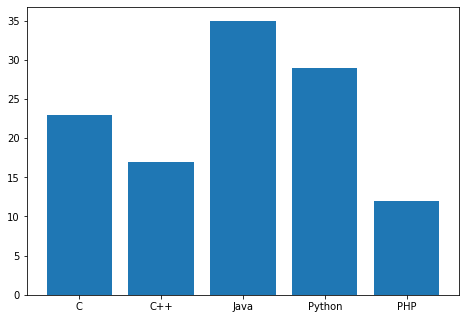

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]

ax.bar(langs,students)
plt.show()

In [17]:
df_my_venues_groupby_type

,type,sp,count
1,Conference,"[SP3, SP4, SP15, SP16, SP20, SP24, SP50, SP1, SP11, SP23, SP31, SP42, SP44, SP48, SP5, SP9, SP19, SP37, SP17, SP29, SP47, SP28, SP32, SP38, SP14, SP22, SP43, SP52, SP8, SP21, SP34, SP53, SP6, SP54, SP10, SP45, SP35, SP39, SP51, SP13, SP7]",41
2,Journal,"[SP12, SP55, SP30, SP40, SP36, SP2, SP27, SP56, SP46]",9
4,Workshop,"[SP25, SP26, SP33, SP18]",4
3,Symposium,"[SP49, SP57]",2
0,Book,[SP41],1


In [33]:
list_of_venues = [each for each in df_my_venues_groupby_type.type]
list_of_venues

['Conference', 'Journal', 'Workshop', 'Symposium', 'Book']

In [34]:
list_of_venues = ['Conference', 'Journal', 'Workshop', 'Symposium', 'Book series']

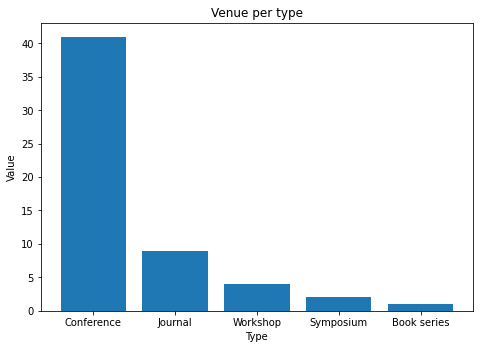

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

list_of_count_venues = [each for each in df_my_venues_groupby_type['count']]

ax.bar(list_of_venues, list_of_count_venues)
plt.title('Venue per type')
plt.xlabel('Type')
plt.ylabel('Value')
plt.show()